# Pendahuluan
Preprocessing merupakan salah satu tahap dalam pemodelan Machine Learning dan dapat dikatakan sebagai tahapan yang terpenting. Bagaimana kita melakukan preprocessing pada suatu data akan sangat memengaruhi hasil dari pemodelan yang kita lakukan.

# Import Library and Data

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scp
import category_encoders as ce
import matplotlib.pyplot as plt

from ipywidgets import interact

Percobaan preprocessing akan dilakukan menggunakan dataset 'titanic' yang telah dibagikan. Pertama buka dataset

In [ ]:
titanic = pd.read_csv('titanic.csv')

# Data Summary
Periksa informasi dari dataset.

In [ ]:
# data shape

print("data: ", titanic.shape)

data:  (891, 12)


In [ ]:
# data info

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


VARIABLE DESCRIPTIONS:
1.  PassengerId : Id of the passenger
2.  pclass      : Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
3.  survived    : Survival
                (0 = No; 1 = Yes)
4.  name        : Name
5.  sex         : Sex
6.  age         : Age
7.  sibsp       : Number of Siblings/Spouses Aboard
8.  parch       : Number of Parents/Children Aboard
9.  ticket      : Ticket Number
10. fare        : Passenger Fare
11. cabin       : Cabin
12. embarked    : Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

# Exploratory Data Analysis (EDA)
Sebelum memulai preprocessing, visualisasi data dapat dilakukan untuk memahami data lebih lanjut

In [ ]:
# Deskripsi statistik data

titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Beberapa metode visualisasi yang umum digunakan untuk merepresentasikan data adalah box plot, bar plot, dan scatter plot.

## Bar plot


Pclass



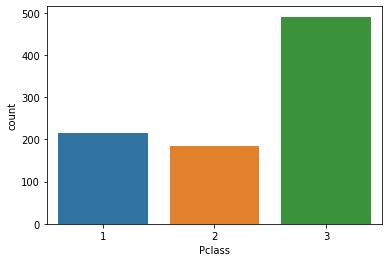

In [ ]:
print('Pclass')
sns.countplot(x = 'Pclass', data = titanic)
print()

Survived



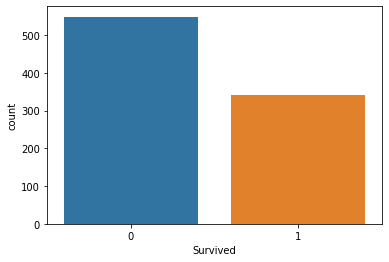

In [ ]:
print('Survived')
sns.countplot(x = 'Survived', data = titanic)
print()

Sex



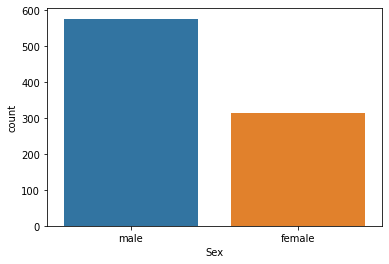

In [ ]:
print('Sex')
sns.countplot(x = 'Sex', data = titanic)
print()

## Scatter Plot

<AxesSubplot:xlabel='Fare', ylabel='Age'>

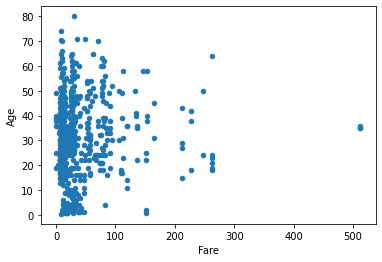

In [ ]:
titanic.plot.scatter(x = "Fare", y = 'Age', figsize = (6, 4))

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

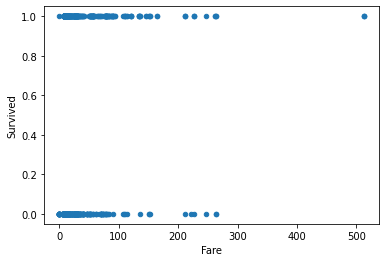

In [ ]:
titanic.plot.scatter(x = "Fare", y = 'Survived', figsize = (6, 4))

## Box Plot

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

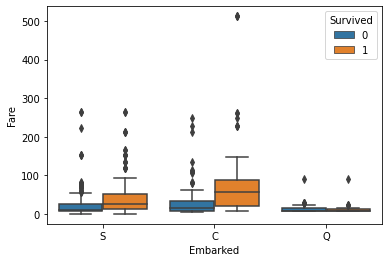

In [ ]:
sns.boxplot(x = "Embarked", y = "Fare", hue = "Survived", data = titanic)

<AxesSubplot:>

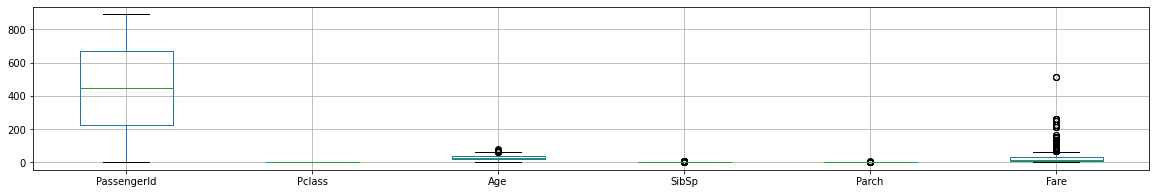

In [ ]:
data = titanic.drop(['Survived'], axis = 1)

data.boxplot(figsize = (20, 3))

# Percobaan 1:
Buatlah minimal 3 visualisasi menggunakan plot yang anda ketahui terhadap beberapa fitur dalam dataset titanic.

In [ ]:
# Plot 1


In [ ]:
# Plot 2


In [ ]:
# Plot 3


In [ ]:
# Plot n

## Correlation
Korelasi merupakan kekuatan hubungan antar 2 fitur, dimana:
- semakin mendekati 1 menandakan korelasi positif kuat (apabila nilai satu fitur naik, fitur kedua ikut naik)
- semakin mendekati -1 menandakan korelasi negatif kuat (apabila nilai satu fitur naik, fitur kedua turun

In [ ]:
titanic.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Correlation between features')

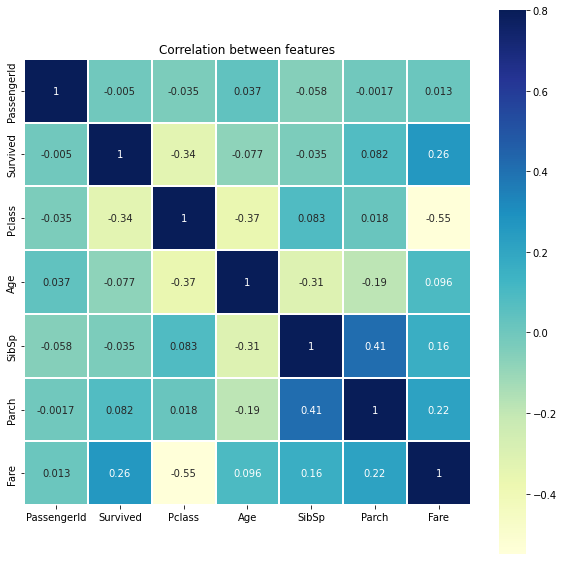

In [ ]:
corr = titanic.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, vmax = .8, linewidths = 0.01, square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation between features')

# Percobaan 2:
Visualisasikan correlation antara fitur pada dataset titanic

In [ ]:
# Plot korelasi


## Frequency
Frekuensi data digunakan untuk melihat pada keadaan apa data sering/jarang muncul. Salah satu metode melihat frekuensi data adalah menggunakan chi-square

In [ ]:
def compute_freq_chi2(x, y):
    freqtab = pd.crosstab(x, y)
    
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")

    chi2, pval, dof, expected = scp.chi2_contingency(freqtab)
    
    print("ChiSquare test statistic: ", chi2)
    print("p-value: ", pval)

    return

In [ ]:
compute_freq_chi2(titanic.Survived, titanic.Pclass)

Frequency table
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
ChiSquare test statistic:  102.88898875696056
p-value:  4.549251711298793e-23


In [ ]:
compute_freq_chi2(titanic.Survived, titanic.Embarked)

Frequency table
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
ChiSquare test statistic:  26.48914983923762
p-value:  1.769922284120912e-06


In [ ]:
compute_freq_chi2(titanic.Survived, titanic.Sex)

Frequency table
Sex       female  male
Survived              
0             81   468
1            233   109
ChiSquare test statistic:  260.71702016732104
p-value:  1.1973570627755645e-58


# Percobaan 3:
check frekuensi menggunakan chi-square terhadap data selain yang telah dicontohkan (minimal 3)

In [ ]:
# code

In [ ]:
# code

In [ ]:
# code

# Preprocessing
Tahapan preprocessing dilakukan agar dataset menjadi lebih bersih.
Beberapa tahap yang dapat dilakukan dalam preprocessing adalah:
- Mengisi nilai kosong
- Memperbaiki fitur dengan nilai yang salah
- Mengatasi outlier
- Normalisasi
- Encoding

## Missing Value
Mengisi nilai kosong dalam dataset dapat dilakukan menggunakan beberapa cara, diantaranya: 
- Menggunakan mean, median, atau modus dari data lain
- Menghapus baris dengan nilai kosong
- Forward Fill dan Backward Fill

In [ ]:
def cek_null(df):
    col_na       = df.isnull().sum().sort_values(ascending = False)
    percent      = col_na / len(df)
    missing_data = pd.concat([col_na, percent], axis = 1, keys = ['Total', 'Percent'])
    
    print(missing_data[missing_data['Total'] > 0])

In [ ]:
cek_null(titanic)

          Total   Percent
Cabin       687  0.771044
Age         177  0.198653
Embarked      2  0.002245


In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 1. Delete the feature

titanic_clean = titanic.drop(['Cabin'], axis = 1)

titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#2. Fill with mean, median, or modus

titanic_clean['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

cek_null(titanic_clean)

          Total   Percent
Embarked      2  0.002245


In [ ]:
#3. Drop row where data is empty

titanic_clean.dropna(inplace = True)

titanic_clean.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#4. Forward Fill (use previous value)

titanic_clean.fillna(method = 'ffill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
#5. Backward Fill (use next value)

titanic_clean.fillna(method = 'bfill')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## Wrong Value
Fitur dengan wrong value adalah data dengan nilai yang tidak sesuai dengan data tersebut (misal data gaji yang dibuat menggunakan data type string). Fitur dengan nilai salah ini perlu diperbaiki karena model dapat mempelajari informasi yang salah dari fitur.

In [ ]:
# check 'Age' and 'Fare' feature data type

print(type(titanic_clean['Age'][0]))
print(type(titanic_clean['Fare'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
(titanic_clean[['Age', 'Fare']].values < 0).any()

False

In [ ]:
# if exist

titanic_clean['Age'].astype('int')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 889, dtype: int64

## Outlier Handling
Outlier merupakan nilai yang jauh berbeda dari nilai2 lain dalam fitur. Outlier handling perlu dilakukan karena data dengan nilai radikal dapat mempengaruhi hasil akhir model (membuat model tidak dapat melakukan generalisasi).

In [ ]:
# Fungsi untuk melakukan drop outlier menggunakan interquartile range

def drop_outlier(x, y):
  df = pd.DataFrame(x, columns = ['x'])
  df['y'] = y

  Q1 = np.percentile(df['x'], 25, interpolation = 'midpoint') # Menentukan Q1
  Q3 = np.percentile(df['x'], 75, interpolation = 'midpoint') # Menentukan Q2
  IQR = Q3 - Q1                                               # Menentukan interquartil range (IQR = Q3 - Q1)
  
  # Menentukan upper dan lower limit menggunakan IQR, Q3, dan Q1
  upper = np.where(df['x'] >= ( Q3 + 1.5 * IQR) )             
  lower = np.where(df['x'] <= ( Q1 - 1.5 * IQR) )
  
  # Drop value di luar upper dan lower limit (drop outlier)
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  df.reset_index(drop = True, inplace = True)

  return df['x'].values, df['y'].values

In [ ]:
@interact 
def OutlierHandling(kolom_x = titanic.columns, kolom_y = titanic.columns): 
    x = titanic[kolom_x].values 
    y = titanic[kolom_y].values

    if (kolom_x != kolom_y) : 
        plt.rcParams["figure.figsize"] = (15, 7)   
        print()
        
        # Box plot sebelum proses drop outlier
        plt.boxplot(x)
        plt.title('Boxplot Fitur')
        plt.show()
        plt.boxplot(y)
        plt.title('Boxplot Target')
        plt.show()
        print(f'Panjang data sebelum drop outlier {len(y)}\n')

        # Melakukan proses drop outlier
        x, y = drop_outlier(x, y)

        # Box plot sesudah proses drop outlier
        plt.boxplot(x)
        plt.title('Boxplot Fitur')
        plt.show()
        plt.boxplot(y)
        plt.title('Boxplot Target')
        plt.show()
        print(f'Panjang data setelah drop outlier {len(y)}')

interactive(children=(Dropdown(description='kolom_x', options=('PassengerId', 'Survived', 'Pclass', 'Name', 'S…

# Normalisasi
Normalisasi merupakan kegiatan untuk menyetarakan nilai numerik dari suatu fitur (biasanya ke antara range 0 dan 1). Normalisasi dapat digunakan untuk mengecilkan ukuran data numerik tanpa menghilangkan informasi dari data tersebut.

In [ ]:
# Min Max Normalization

min_fare = np.min(titanic_clean['Fare'])
max_fare = np.max(titanic_clean['Fare'])

titanic_clean['Fare'] = (titanic_clean['Fare'] - min_fare) / (max_fare - min_fare)

titanic_clean['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 889, dtype: float64

# Encoding
Encoding merupakan proses mengubah data ke bentuk berbeda yang umumnya dilakukan terhadap data kategori (mengubah ke bentuk numerik). Proses encoding sangat penting dikarenakan komputer hanya dapat mengelola dapat berbentuk numerik, sehingga agar data kategori dapat dikelola perlu dilakukan encoding terlebih dahulu.

In [ ]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,S


In [ ]:
# Check unique value in some feature
print('Sex unique     : ' + str(titanic_clean['Sex'].unique()),      '\n')
print('Embarked unique: ' + str(titanic_clean['Embarked'].unique()), '\n')
print('Ticket unique  : ' + str(titanic_clean['Ticket'].unique()),   '\n')

Sex unique     : ['male' 'female'] 

Embarked unique: ['S' 'C' 'Q'] 

Ticket unique  : ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500'

In [ ]:
# Do Binary Encoding to 'Embarked' feature

encoder       = ce.BinaryEncoder(cols = ['Embarked'], return_df = True)
titanic_clean = encoder.fit_transform(titanic_clean) 

titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,0,1


In [ ]:
# Do Label Encoding to feature 'Sex'

titanic_clean['Sex'] = np.where(titanic_clean['Sex'] == 'male', 1, 0 )

titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_0,Embarked_1
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.014151,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,0.139136,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.015469,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.103644,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.015713,0,1


# Finishing Touch
Terakhir, kita dapat menghapus fitur-fitur yang dinilai tidak memiliki hubungan terhadap data (seperti id, nama, dll).

In [ ]:
# Lastly delete feature 'Name', 'Ticket', and 'PassengerId'

titanic_final = titanic_clean.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

titanic_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1
0,0,3,1,22.0,1,0,0.014151,0,1
1,1,1,0,38.0,1,0,0.139136,1,0
2,1,3,0,26.0,0,0,0.015469,0,1
3,1,1,0,35.0,1,0,0.103644,0,1
4,0,3,1,35.0,0,0,0.015713,0,1


# Percobaan 4:
Ikuti semua percobaan preprocessing yang ditampilkan, kemudian kumpulkan file .ipynb

# Tugas Praktikum

**Buatlah Preprocessing menggunakan dataset yang berbeda. Kumpulkan di minggu depan, hari rabu jam 11.59WIB. Untuk format menyusul.**